## Train a Deep Q-Learning Agent to solve the Banana Unity Environment

This project presents an agent to solve the banana environment of the Unity module for python

The first thing to do is to load the module environment that allows us to interact with the unity environment in a simplified way.

In [1]:
from environment import Env

Now, let's initialize the environment of the Banana.app

In [2]:
env = Env(file_name="Banana_Windows_x86_64/Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


state_size: 37  action_size: 4


In [3]:
#These are the available functions for the Env class
"""
env.reset(train_mode=False)
env.execute(0)
env.close()
"""

'env.reset(train_mode=False)\nenv.execute(0)\nenv.close()'

It is time to create our agent, it will have as input size the state_size of the env and as output, we expect to have one neuron for each available action for the agent, so we assign the action_size variable of the environment as the output.

In [4]:
#define the agent
from dqn_agent import Agent
#agent = Agent(state_size=8, action_size=4, seed=0)
agent = Agent(state_size=env.state_size, action_size=env.action_size, seed=0)
agent.qnetwork_local

QNetwork(
  (fc1): Linear(in_features=37, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=4, bias=True)
)

You can see how an untrained agent performs and how it interacts with the environment

In [5]:
state = env.reset(train_mode=False)
# watch an untrained agent
for j in range(3):
    action = agent.act(state)
    print("iter: ", j, "action: ", action)
    state, reward, done = env.execute(action)
    print("state: {}, \nreward: {}, done: {}\n\n".format(state, reward, done))
    if done:
        break 

iter:  0 action:  1
state: [ 0.          1.          0.          0.          0.17788731  0.
  1.          0.          0.          0.21135208  1.          0.
  0.          0.          0.3379637   0.          1.          0.
  0.          0.15728076  1.          0.          0.          0.
  0.58536041  0.          1.          0.          0.          0.16940029
  0.          1.          0.          0.          0.33455756  0.
 -7.81049395], 
reward: 0.0, done: False


iter:  1 action:  0
state: [0.         1.         0.         0.         0.17886539 0.
 1.         0.         0.         0.21251413 1.         0.
 0.         0.         0.33721545 0.         1.         0.
 0.         0.15814552 1.         0.         0.         0.
 0.5851512  0.         1.         0.         0.         0.17033167
 0.         1.         0.         0.         0.33639702 0.
 3.39042234], 
reward: 0.0, done: False


iter:  2 action:  2
state: [0.         1.         0.         0.         0.15313216 0.
 1.         0. 

We need to import some necessary modules like torch and numpy.

In [6]:
#import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Finally, the agent will be trained. It is set to be trained during 1500 episodes.

Episode 100	Average Score: 1.02
Episode 200	Average Score: 4.79
Episode 300	Average Score: 8.30
Episode 400	Average Score: 11.61
Episode 500	Average Score: 14.27
Episode 542	Average Score: 14.66
Environment solved
Episode 543	Average Score: 14.59
Environment solved
Episode 544	Average Score: 14.64
Environment solved
Episode 545	Average Score: 14.66
Environment solved
Episode 546	Average Score: 14.71
Environment solved
Episode 547	Average Score: 14.69
Environment solved
Episode 548	Average Score: 14.69
Environment solved
Episode 549	Average Score: 14.67
Environment solved
Episode 550	Average Score: 14.65
Environment solved
Episode 551	Average Score: 14.63
Environment solved
Episode 552	Average Score: 14.60
Environment solved
Episode 553	Average Score: 14.56
Environment solved
Episode 554	Average Score: 14.51
Environment solved
Episode 555	Average Score: 14.49
Environment solved
Episode 556	Average Score: 14.43
Environment solved
Episode 557	Average Score: 14.43
Environment solved
Episod

Episode 697	Average Score: 13.81
Environment solved
Episode 698	Average Score: 13.84
Environment solved
Episode 699	Average Score: 13.89
Environment solved
Episode 700	Average Score: 13.94

Environment solved
Episode 701	Average Score: 13.99
Environment solved
Episode 702	Average Score: 13.93
Environment solved
Episode 703	Average Score: 13.87
Environment solved
Episode 704	Average Score: 13.89
Environment solved
Episode 705	Average Score: 13.96
Environment solved
Episode 706	Average Score: 14.02
Environment solved
Episode 707	Average Score: 14.10
Environment solved
Episode 708	Average Score: 14.02
Environment solved
Episode 709	Average Score: 14.04
Environment solved
Episode 710	Average Score: 14.21
Environment solved
Episode 711	Average Score: 14.28
Environment solved
Episode 712	Average Score: 14.32
Environment solved
Episode 713	Average Score: 14.35
Environment solved
Episode 714	Average Score: 14.42
Environment solved
Episode 715	Average Score: 14.42
Environment solved
Episode 716

Episode 855	Average Score: 14.57
Environment solved
Episode 856	Average Score: 14.56
Environment solved
Episode 857	Average Score: 14.60
Environment solved
Episode 858	Average Score: 14.70
Environment solved
Episode 859	Average Score: 14.79
Environment solved
Episode 860	Average Score: 14.85
Environment solved
Episode 861	Average Score: 14.94
Environment solved
Episode 862	Average Score: 14.94
Environment solved
Episode 863	Average Score: 14.95
Environment solved
Episode 864	Average Score: 14.91
Environment solved
Episode 865	Average Score: 14.94
Environment solved
Episode 866	Average Score: 15.02
Environment solved
Episode 867	Average Score: 14.98
Environment solved
Episode 868	Average Score: 14.95
Environment solved
Episode 869	Average Score: 15.03
Environment solved
Episode 870	Average Score: 15.05
Environment solved
Episode 871	Average Score: 15.07
Environment solved
Episode 872	Average Score: 15.13
Environment solved
Episode 873	Average Score: 15.12
Environment solved
Episode 874	

Episode 1013	Average Score: 15.12
Environment solved
Episode 1014	Average Score: 15.08
Environment solved
Episode 1015	Average Score: 14.94
Environment solved
Episode 1016	Average Score: 14.79
Environment solved
Episode 1017	Average Score: 14.84
Environment solved
Episode 1018	Average Score: 14.83
Environment solved
Episode 1019	Average Score: 14.86
Environment solved
Episode 1020	Average Score: 14.95
Environment solved
Episode 1021	Average Score: 14.85
Environment solved
Episode 1022	Average Score: 14.89
Environment solved
Episode 1023	Average Score: 14.87
Environment solved
Episode 1024	Average Score: 14.76
Environment solved
Episode 1025	Average Score: 14.74
Environment solved
Episode 1026	Average Score: 14.78
Environment solved
Episode 1027	Average Score: 14.79
Environment solved
Episode 1028	Average Score: 14.86
Environment solved
Episode 1029	Average Score: 14.91
Environment solved
Episode 1030	Average Score: 14.87
Environment solved
Episode 1031	Average Score: 14.87
Environment 

Episode 1168	Average Score: 15.97
Environment solved
Episode 1169	Average Score: 15.88
Environment solved
Episode 1170	Average Score: 15.82
Environment solved
Episode 1171	Average Score: 15.72
Environment solved
Episode 1172	Average Score: 15.67
Environment solved
Episode 1173	Average Score: 15.57
Environment solved
Episode 1174	Average Score: 15.63
Environment solved
Episode 1175	Average Score: 15.62
Environment solved
Episode 1176	Average Score: 15.70
Environment solved
Episode 1177	Average Score: 15.78
Environment solved
Episode 1178	Average Score: 15.84
Environment solved
Episode 1179	Average Score: 15.68
Environment solved
Episode 1180	Average Score: 15.64
Environment solved
Episode 1181	Average Score: 15.65
Environment solved
Episode 1182	Average Score: 15.69
Environment solved
Episode 1183	Average Score: 15.65
Environment solved
Episode 1184	Average Score: 15.62
Environment solved
Episode 1185	Average Score: 15.59
Environment solved
Episode 1186	Average Score: 15.57
Environment 

Episode 1323	Average Score: 16.80
Environment solved
Episode 1324	Average Score: 16.85
Environment solved
Episode 1325	Average Score: 16.82
Environment solved
Episode 1326	Average Score: 16.82
Environment solved
Episode 1327	Average Score: 16.92
Environment solved
Episode 1328	Average Score: 16.93
Environment solved
Episode 1329	Average Score: 16.90
Environment solved
Episode 1330	Average Score: 16.83
Environment solved
Episode 1331	Average Score: 16.81
Environment solved
Episode 1332	Average Score: 16.79
Environment solved
Episode 1333	Average Score: 16.77
Environment solved
Episode 1334	Average Score: 16.87
Environment solved
Episode 1335	Average Score: 16.84
Environment solved
Episode 1336	Average Score: 16.88
Environment solved
Episode 1337	Average Score: 16.94
Environment solved
Episode 1338	Average Score: 16.95
Environment solved
Episode 1339	Average Score: 16.98
Environment solved
Episode 1340	Average Score: 17.00
Environment solved
Episode 1341	Average Score: 17.04
Environment 

Episode 1478	Average Score: 16.80
Environment solved
Episode 1479	Average Score: 16.84
Environment solved
Episode 1480	Average Score: 16.87
Environment solved
Episode 1481	Average Score: 16.92
Environment solved
Episode 1482	Average Score: 16.85
Environment solved
Episode 1483	Average Score: 16.85
Environment solved
Episode 1484	Average Score: 16.87
Environment solved
Episode 1485	Average Score: 16.93
Environment solved
Episode 1486	Average Score: 17.01
Environment solved
Episode 1487	Average Score: 17.00
Environment solved
Episode 1488	Average Score: 17.03
Environment solved
Episode 1489	Average Score: 17.01
Environment solved
Episode 1490	Average Score: 16.96
Environment solved
Episode 1491	Average Score: 17.02
Environment solved
Episode 1492	Average Score: 17.12
Environment solved
Episode 1493	Average Score: 17.09
Environment solved
Episode 1494	Average Score: 16.99
Environment solved
Episode 1495	Average Score: 17.04
Environment solved
Episode 1496	Average Score: 16.93
Environment 

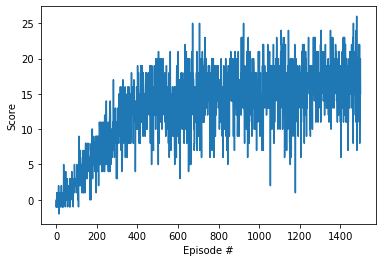

In [7]:
def dqn(n_episodes=1500, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    counter = 0                        #if the counter is 100 or more the envrinment is consider solved
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset(train_mode=True)
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done = env.execute(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0 and counter>=100:
            print('\nEnvironment solved'.format(i_episode-100))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            #break
        elif np.mean(scores_window)>=13.0:
            counter += 1
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [9]:
#save the agent weights
torch.save(agent.qnetwork_local.state_dict(), 'final_checkpoint.pth')

In [ ]:
env.close()